<br><br><span style='font-size:50px'>Reading and Discovering the Dataset</span>

In [1]:
import pandas as pd
import pickle

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data.sample(10)

,review,sentiment
33059,"Hi! Being able to speak Cantonese, I found thi...",positive
42208,"Riveting drama, scripted by William Mastrosimo...",positive
25807,The Detonator is set in Bucharest where some s...,negative
47331,This is truly a re-make that should never have...,negative
45586,"In the Fiji islands, the greedy and unscrupulo...",negative
16195,"Let me start by saying that ""War, Inc"" is not ...",positive
29236,I really enjoyed this film. I'm not usually on...,positive
7605,I found it real shocking at first to see Willi...,positive
25727,This is probably one of the worst movies I hav...,negative
29386,"Wow, I haven't seen a movie this bad since ""Fi...",negative


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.duplicated().sum()

418

In [7]:
# duplicated_values = data[data['review'].duplicated()]['review']
# duplicated_values

In [8]:
data = data.drop_duplicates(subset=['review']).reset_index(drop=True)

In [9]:
data['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

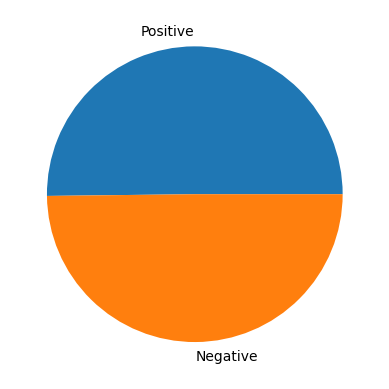

In [11]:
data_dist = [
    len(data[data['sentiment']=='positive']),
    len(data[data['sentiment']=='negative'])
]
labels = ['Positive','Negative']
plt.pie(data_dist, labels = labels)
plt.show

<br><br><span style='font-size:50px'>Data Preprocessing</span>

In [12]:
import re

<br><br><span style='font-size:30px'>Removing HTML Tags</span>

In [13]:
def removeHTML(text):
    text = re.sub(r'<[^>]*>', '', text)
    return(text)

<br><br><span style='font-size:30px'>Removing Stop Words</span>

In [14]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [15]:
def removeStopWords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return(text)

<br><br><span style='font-size:30px'>Text Lemmatizing</span>

In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [17]:
def Lemmatizing(text):
    text = lemmatizer.lemmatize(text)
    return(text)

<br><br><span style='font-size:30px'>Removing Noise</span>

In [18]:
def removeNoise(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text) # Only keep English letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)   #Normalize Repeated Letters
    text = re.sub(r'\s{2,}', ' ', text).strip() # Removing extra spaces
    return(text)

<br><br><br><br><span style='font-size:50px'>Adding New Column for the Cleaned Text</span>

In [19]:
CleanedText = []

In [20]:
for i in range(len(data)):
    text = data.review[i]
    text = removeHTML(text)
    text = removeStopWords(text)
    text = Lemmatizing(text)
    text = removeNoise(text)
    CleanedText.append(text)

In [21]:
data['CleanedText'] = CleanedText

In [22]:
#data = data.drop(['CleanedText'],axis=1)

In [23]:
data.head()

,review,sentiment,CleanedText
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [24]:
data.sample(20)

,review,sentiment,CleanedText
16435,Movie didn't have much plot and was uninterest...,negative,movie much plot uninteresting basically spend ...
7622,...but it's still an entertaining TV movie. Th...,positive,but still entertaining tv movie transposition ...
25288,"First, I'm a huge Buddy Holly fan. I grew up k...",positive,first im huge buddy holly fan grew knowing was...
20620,Black Scorpion is a fun flick about a groovy f...,positive,black scorpion fun flick groovy female super h...
37307,Maybe it's because I'm no fan of the comics (b...,negative,maybe im fan comics but comics quality movie h...
37000,When one stops to recollect upon the frequent ...,positive,one stops recollect upon frequent screen teami...
43923,Superb movie. Very good photography of 1969/70...,positive,superb movie good photography bolton seems dif...
25402,This film is about a mysterious love letter th...,negative,film mysterious love letter turned peoples lov...
36979,"""The Garden of Allah"" was one of the first fea...",positive,the garden allah one first feature length stri...
5942,Talking about competition features at the Spli...,positive,talking competition features split film festiv...


<br><br><span style='font-size:50px'>Splitting Data into Training and Testing</span>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

<br><br><span style='font-size:50px'>Feature Extraction using TF-IDF Vectorizer</span>

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [28]:
X_train = vectorizer.fit_transform(train['CleanedText'])
pickle.dump(vectorizer,open("vectorizer.pkl","wb"))

X_test = vectorizer.transform(test['CleanedText'])

<br><br><span style='font-size:50px'>Model Building & Evaluation</span>

In [29]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

<br><br><span style='font-size:30px'>Random Forest</span>

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
rf.fit(X_train, train['sentiment'])

RandomForestClassifier(n_jobs=-1, random_state=0)

In [32]:
pred_y_rf = rf.predict(X_test)

In [33]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_rf))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_rf))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_rf, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4909
    positive       0.86      0.85      0.85      5008

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

____________________________________________________________________________________________________
Accuracy: 0.8504588081072905
____________________________________________________________________________________________________
F1 Score: 0.8504625335452527


In [34]:
with open("model_sentiment.pkl", "wb") as f:
    pickle.dump(rf, f)